In [1]:
import os
import numpy as np
import sys
from sklearn import svm

In [2]:
script_dir=os.getcwd()
rel_path="Input_data/UCI_HAR/"
abs_path=os.path.join(script_dir,rel_path)

In [3]:
X_train=np.loadtxt(abs_path+'train/X_train.txt')
y_train=np.loadtxt(abs_path+'train/y_train.txt')

In [4]:
X_train.shape

(7352, 561)

In [5]:
X_train_2=X_train[:,559:561]

In [6]:
clf_2=svm.LinearSVC(dual=False)
clf_2.fit(X_train_2,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
X_test=np.loadtxt(abs_path+'test/X_test.txt')
y_test=np.loadtxt(abs_path+'test/y_test.txt')

In [8]:
X_test_2=X_test[:,559:561]

In [9]:
clf_2.score(X_train_2,y_train)

0.45525027203482044

In [10]:
X_test_2.shape

(2947, 2)

In [11]:
clf_2.score(X_test_2,y_test)

0.41635561588055647

In [12]:
clf=svm.LinearSVC(dual=False)
clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
clf.coef_.shape

(6, 561)

In [14]:
for i in range(6):
    curr_w=np.abs(clf.coef_[i,:])
    curr_ind=np.argpartition(curr_w,2)[-2:]
    print curr_w[curr_ind], curr_ind

[ 0.12771648  0.00909127] [559 560]
[ 0.52275231  0.23612362] [559 560]
[ 0.16917576  0.05389096] [559 560]
[ 0.77657699  0.02151168] [559 560]
[ 1.06771027  0.161526  ] [559 560]
[ 0.08440422  0.04454948] [559 560]


In [15]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train_2[:, 0].min() - 1, X_train_2[:, 0].max() + 1
y_min, y_max = X_train_2[:, 1].min() - 1, X_train_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [16]:
from matplotlib import pyplot as plt
#%matplotlib inline

In [17]:
plt.subplot(111)
Z = clf_2.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
colors=plt.cm.Paired(np.linspace(0,1,6))

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

indices=np.random.randint(0,7352,1)

# Plot also the training points
plt.scatter(X_train_2[0:1000, 0], X_train_2[0:1000, 1], c=y_train[0:1000],cmap= plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
np.linspace(0,1,6)

In [ ]:
colors

In [ ]:
plt.scatter( range(6), [0]*6, color=colors )
plt.axis("off")
plt.show()

In [ ]:
y_train[0:10]

In [ ]:
y_train

In [ ]:
print X_train_2[0:10,0], X_train_2[0:10,1]

In [ ]:
clf_2.predict(X_train_2[0:100,:])

In [ ]:
Z

In [ ]:
indices_1_4=np.where((y_train==1) | (y_train==4))
X_train_1_4=X_train[indices_1_4,:]
y_train_1_4=y_train[indices_1_4]

In [ ]:
X_train_1_4=X_train_1_4.reshape((2512,561))

In [ ]:
clf_1_4=svm.LinearSVC(dual=False)
clf_1_4.fit(X_train_1_4,y_train_1_4)

In [ ]:
indices_1_4_t=np.where((y_test==1) | (y_test==4))
X_test_1_4=X_test[indices_1_4_t,:].reshape((987,561))
y_test_1_4=y_test[indices_1_4_t]

In [ ]:
clf_1_4.score(X_test_1_4,y_test_1_4)

In [ ]:
X_train_1_4_m=X_train_1_4[:,559:561]
X_test_1_4_m=X_test_1_4[:,559:561]

In [ ]:
clf_1_4_m=svm.LinearSVC(dual=False)
clf_1_4_m.fit(X_train_1_4_m,y_train_1_4)
clf_1_4_m.score(X_test_1_4_m,y_test_1_4)

In [ ]:
h = .002  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train_1_4_m[:, 0].min() - 1, X_train_1_4_m[:, 0].max() + 1
y_min, y_max = X_train_1_4_m[:, 1].min() - 1, X_train_1_4_m[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [ ]:
plt.subplot(111)
Z = clf_1_4_m.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.Paired, alpha=0.8)
# Plot also the training points
plt.scatter(X_train_1_4_m[:, 0], X_train_1_4_m[:, 1],cmap=plt.cm.Paired, c=y_train_1_4)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [39]:
np.savetxt('HAR_1_4_test.txt',X_test_1_4)
np.savetxt('HAR_1_4_labels.txt',y_test_1_4)

In [41]:
X_test_1_4.shape

(987, 561)

In [40]:
import tsne

In [54]:
Y=tsne.tsne(X_test_1_4,2,561,30.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  987 ...
Computing P-values for point  500  of  987 ...
Mean value of sigma:  1.54540546554
Iteration  10 : error is  16.9304238551
Iteration  20 : error is  14.7464026361
Iteration  30 : error is  13.698062356
Iteration  40 : error is  13.2825444996
Iteration  50 : error is  13.2270517283
Iteration  60 : error is  13.2217150727
Iteration  70 : error is  13.1775310564
Iteration  80 : error is  13.1626455546
Iteration  90 : error is  13.1511855982
Iteration  100 : error is  13.1345495014
Iteration  110 : error is  1.30722844689
Iteration  120 : error is  1.06641108881
Iteration  130 : error is  0.951889833711
Iteration  140 : error is  0.877005787946
Iteration  150 : error is  0.823009146739
Iteration  160 : error is  0.782502052261
Iteration  170 : error is  0.752790518888
Iteration  180 : error is  0.730139159257
Iteration  190 : error is  0.712404600989
Iteration  200 : error is  0

In [43]:
labels=y_test_1_4

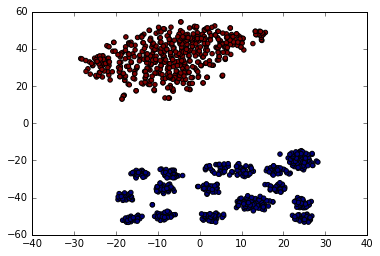

In [47]:
plt.legend
plt.scatter(Y[:,0], Y[:,1], 20, labels)

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca=PCA(n_components=100)

In [50]:
X_train_1_4_dr=pca.fit_transform(X_train_1_4)

In [51]:
X_test_1_4_dr=pca.transform(X_test_1_4)

In [52]:
Y_rd=tsne.tsne(X_test_1_4_dr,2,100,50.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  987 ...
Computing P-values for point  500  of  987 ...
Mean value of sigma:  1.62642346658
Iteration  10 : error is  15.4519336325
Iteration  20 : error is  13.1966201679
Iteration  30 : error is  12.62852058
Iteration  40 : error is  12.5576922998
Iteration  50 : error is  12.4683796098
Iteration  60 : error is  12.447188421
Iteration  70 : error is  12.4033481323
Iteration  80 : error is  12.3874248763
Iteration  90 : error is  12.3778967864
Iteration  100 : error is  12.3622426078
Iteration  110 : error is  1.05284867111
Iteration  120 : error is  0.864279645571
Iteration  130 : error is  0.783316722749
Iteration  140 : error is  0.732459933002
Iteration  150 : error is  0.695167686334
Iteration  160 : error is  0.668573154191
Iteration  170 : error is  0.648605739087
Iteration  180 : error is  0.633689152171
Iteration  190 : error is  0.622005912623
Iteration  200 : error is  0.

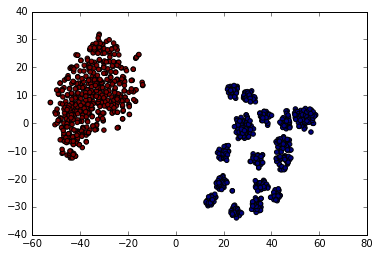

In [53]:
plt.scatter(Y_rd[:,0], Y_rd[:,1], 20, labels)